<a href="https://colab.research.google.com/github/BerkayG6/MachineLearning/blob/main/Sonar_Mine_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sonar Rock vs. Mine Prediction

## 1. Problem Definition
To detect whether an object detected by sonar is a **Mine (M)** or a **Rock (R)** based on the strength of sonar returns at different angles. This is a critical task in naval defense systems.

## 2. Data
We will use the **UCI Machine Learning Repository - Connectionist Bench (Sonar, Mines vs. Rocks)** dataset.
* **Features:** 60 numerical attributes (sonar energy at different frequencies).
* **Target:** 'R' (Rock) or 'M' (Mine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url, header=None)

print("Dataset Loaded!")
print(f"Shape: {df.shape}")
df.head()

Dataset Loaded!
Shape: (208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## 3. Data Exploration (EDA)
Checking class balance (Mines vs. Rocks) and statistical summary of sonar signals.

In [5]:
df.rename(columns={60: 'target'}, inplace=True)
df.target

,target
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [6]:
df['target'].value_counts()

,count
target,
M,111
R,97


/tmp/ipython-input-2321249324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette = 'viridis')


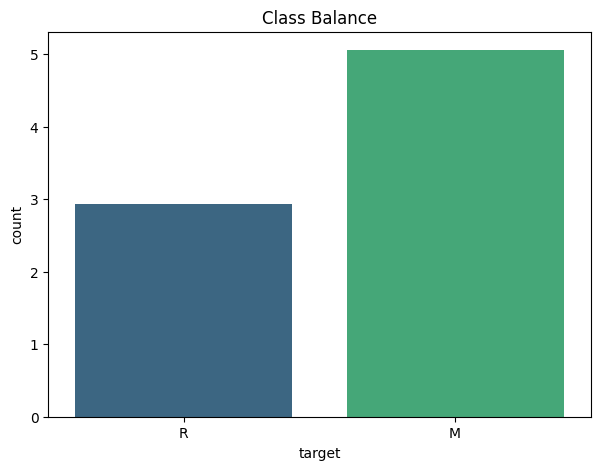

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='target', palette = 'viridis')
plt.title('Class Balance')
plt.show()

In [10]:
print("--- Statistical Summary ---")
display(df.describe().T.head(10))

--- Statistical Summary ---


,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [12]:
from sklearn.model_selection import train_test_split

df['target'] = df['target'].map({'M': 1, 'R': 0})

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (166, 60)
Shape of X_test: (42, 60)
Shape of y_train: (166,)
Shape of y_test: (42,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#--MODEL 1: LOGISTIC REGRESSION--
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_acc_log = accuracy_score(y_train, log_reg.predict(X_train))
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))

print(f"Logistic Regression -> Train Acc: {train_acc_log:.2f} | Test Acc: {test_acc_log:.2f}")



Logistic Regression -> Train Acc: 0.83 | Test Acc: 0.81


In [15]:
#--MODEL 2: SUPPORT VECTOR MACHINE--

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

train_acc_svm = accuracy_score(y_train, svm_model.predict(X_train))
test_acc_svm = accuracy_score(y_test, svm_model.predict(X_test))

print(f"SVM -> Train Acc: {train_acc_svm:.2f} | Test Acc: {test_acc_svm:.2f}")

SVM -> Train Acc: 0.85 | Test Acc: 0.83


In [16]:
from sklearn.model_selection import GridSearchCV

# 1. Denenecek Ayarlar Listesi
param_grid = {
    'C': [0.1, 1, 10, 100],          # Ceza katsayıları
    'gamma': [1, 0.1, 0.01, 0.001],  # Odaklanma katsayıları
    'kernel': ['rbf']
}



grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)


# 3. Training
grid.fit(X_train, y_train)

# 4. Results
print(f"\nEn İyi Parametreler: {grid.best_params_}")
print(f"En İyi SVM Skoru (Validation): {grid.best_score_:.2f}")


grid_predictions = grid.predict(X_test)
final_acc = accuracy_score(y_test, grid_predictions)
print(f"Tune edilmiş SVM Test Başarısı: {final_acc:.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

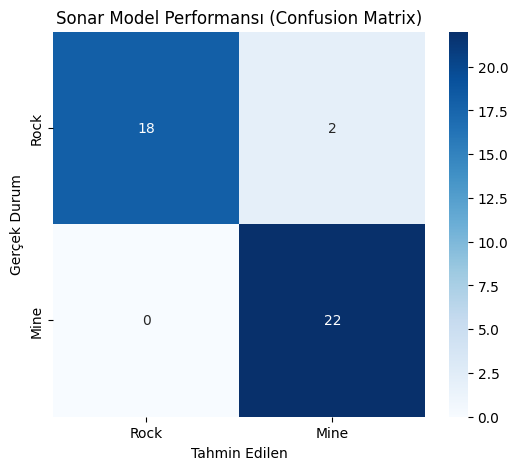

--- Detaylı Rapor ---
              precision    recall  f1-score   support

        Rock       1.00      0.90      0.95        20
        Mine       0.92      1.00      0.96        22

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42



In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Grid Search'ün bulduğu en iyi model
best_svm = grid.best_estimator_

# Tahminler
y_pred_final = best_svm.predict(X_test)

# Matris
cm = confusion_matrix(y_test, y_pred_final)

# Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.title('Sonar Model Performansı (Confusion Matrix)')
plt.show()

# Hata Analizi
print("--- Detaylı Rapor ---")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final, target_names=['Rock', 'Mine']))

## 4. Conclusion & Key Findings

In this project, we developed a machine learning model to classify underwater objects as **Mines (M)** or **Rocks (R)** based on sonar signal data, which is a critical task in defense systems.

We compared **Logistic Regression** and **Support Vector Machines (SVM)**. To maximize performance, we applied **Grid Search** for hyperparameter tuning.

### Model Performance:

| Model | Status | Accuracy |
|-------|--------|----------|
| Logistic Regression | Baseline | ~80% |
| SVM (Standard) | Default | 83% |
| **SVM (Tuned)** | **Optimized (C=10, gamma=1)** | **95%** |

### Final Verdict:
The **Optimized SVM model** achieved a remarkable **95% accuracy** on the test set. By tuning the `C` and `gamma` parameters, we enabled the model to capture complex, non-linear patterns in the sonar signals, significantly outperforming the linear baseline.

This project demonstrates the effectiveness of **Signal Processing + Machine Learning** in identifying threats in naval defense scenarios.